Basic Kaggle warmup - the Titanic dataset

In [18]:
###!pip3 install pandas
###!pip3 install seaborn
###!pip3 install sklearn

  Using cached scikit_learn-0.19.1-cp36-cp36m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
  Running setup.py bdist_wheel for sklearn ... done
  Stored in directory: /Users/Steve/Library/Caches/pip/wheels/d7/db/a3/1b8041ab0be63b5c96c503df8e757cf205c2848cf9ef55f85e
Successfully built sklearn


In [2]:
# Get the data!
import numpy as np 
import pandas as pd 

from os import path

%matplotlib inline
import matplotlib.pyplot as plt

data_dir = "./titanic/data/"
train = pd.read_csv(path.join(data_dir,"train.csv"))
test = pd.read_csv(path.join(data_dir,"test.csv"))


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train.describe(include=[ 'O' ])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [5]:
# Cabin looks pretty useless as it has so many nulls
# PassengerId and Ticket also not useful.

# fare and age have nulls but we can use medians there
for dataset in [train, test]:    
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
    # Name is probably pretty useless too, but other Kaggle folks suggest the title is relevant, so extract that then drop the name.
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    
    dataset.drop(['PassengerId','Cabin', 'Ticket', 'Name'], axis=1, inplace = True)
    


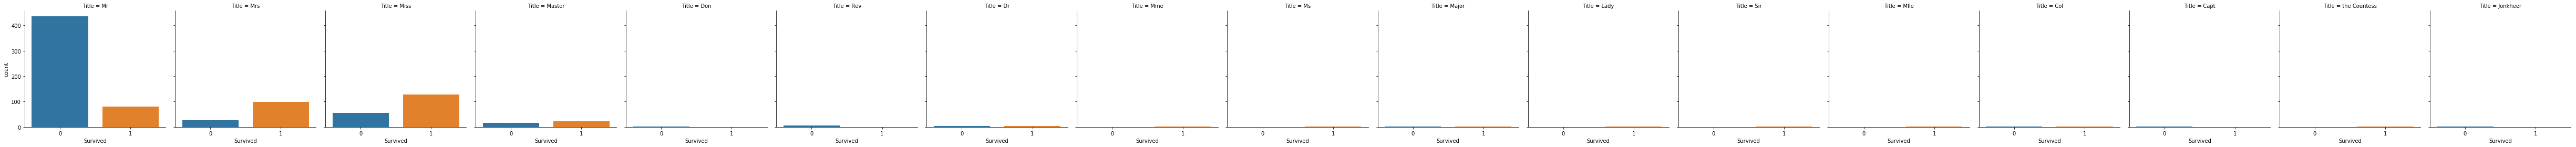

In [15]:
# Verify that title is relevant
import seaborn as sns

sns.factorplot(x='Survived', col='Title', kind='count', data=train);
plt.show()

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null object
Title       418 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [22]:
# Convert categorical data to meaningful numeric
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for dataset in [train, test]:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    
    dataset.drop(['Sex','Embarked', 'Title'], axis=1, inplace = True)


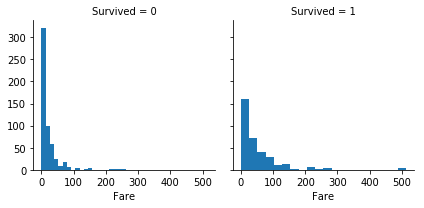

In [26]:
# Take a look at what's left
grid = sns.FacetGrid(train, col='Survived')
grid.map(plt.hist, 'Fare', bins=20)

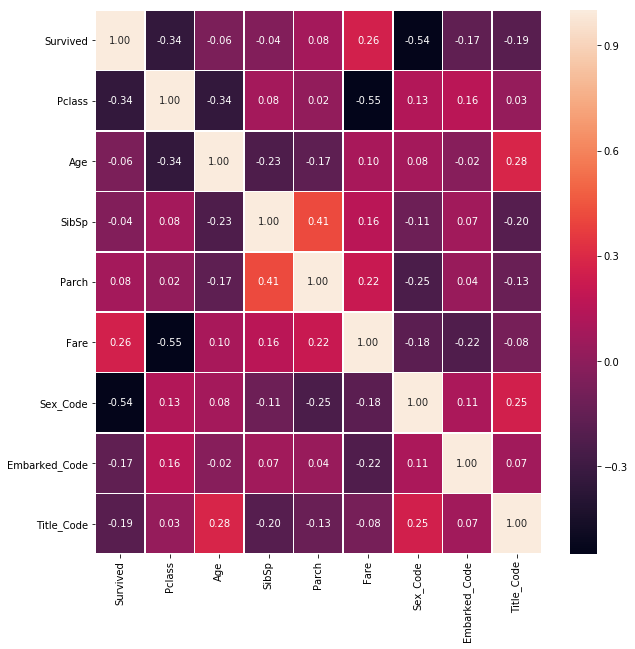

In [28]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train.corr(), annot=True, linewidths=0.5, fmt='.2f',ax=ax)
plt.show()